In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_csv(r"/kaggle/input/cardiovascular-disease-dataset/cardio_train.csv" , sep=";")
data=df.copy()
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [3]:
df.set_index("id" , inplace=True)

In [4]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
99996,19066,2,183,105.0,180,90,3,1,0,1,0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.9 MB


In [6]:
df.corr(numeric_only=True)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
age,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159
gender,-0.022811,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109
height,-0.081515,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821
weight,0.053684,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660
ap_hi,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475
ap_lo,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719
cholesterol,0.154424,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147
gluc,0.098703,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307
smoke,-0.047633,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486
alco,-0.029723,0.170966,0.094419,0.067113,0.001408,0.010601,0.035760,0.011246,0.340094,1.000000,0.025476,-0.007330


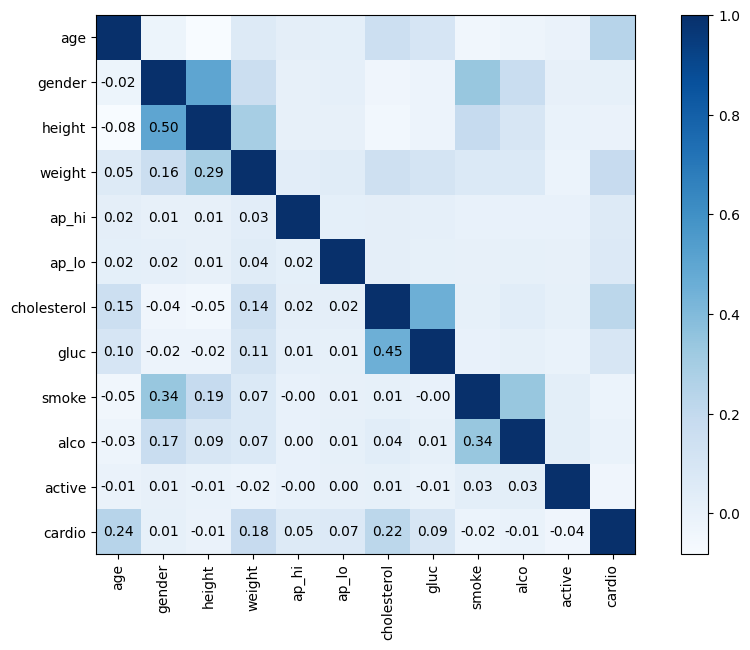

In [7]:
corr = df.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(12, 7))
plt.imshow(corr, cmap='Blues')
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)

for i in range(len(corr)):
    for j in range(len(corr)):
        if not mask[i, j]:
            plt.text(j, i, f"{corr.iloc[i, j]:.2f}", ha='center', va='center', color='black')

plt.show()


In [9]:
df.gluc.replace([1,2,3] , ["normal", "above normal","well above normal"], inplace=True)

In [10]:
df.smoke.replace([0,1] , ["No" , "Yes"] , inplace=True)

In [11]:
df.gender.replace([1,2],["Women"  ,"Men"] , inplace=True)

In [12]:
df['alco'].replace({0: "Doesn't Drink", 1: "Drink"} , inplace=True )

In [13]:
df['active'].replace({0: 'Inactive', 1: 'Active'} , inplace=True )

In [14]:
df['cardio'].replace({0: 'No Disease', 1: 'Has Disease'} , inplace=True )

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  object 
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  object 
 7   gluc         70000 non-null  object 
 8   smoke        70000 non-null  object 
 9   alco         70000 non-null  object 
 10  active       70000 non-null  object 
 11  cardio       70000 non-null  object 
dtypes: float64(1), int64(4), object(7)
memory usage: 6.9+ MB


In [16]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,Men,168,62.0,110,80,normal,normal,No,Doesn't Drink,Active,No Disease
1,20228,Women,156,85.0,140,90,well above normal,normal,No,Doesn't Drink,Active,Has Disease
2,18857,Women,165,64.0,130,70,well above normal,normal,No,Doesn't Drink,Inactive,Has Disease
3,17623,Men,169,82.0,150,100,normal,normal,No,Doesn't Drink,Active,Has Disease
4,17474,Women,156,56.0,100,60,normal,normal,No,Doesn't Drink,Inactive,No Disease
...,...,...,...,...,...,...,...,...,...,...,...,...
99993,19240,Men,168,76.0,120,80,normal,normal,Yes,Doesn't Drink,Active,No Disease
99995,22601,Women,158,126.0,140,90,above normal,above normal,No,Doesn't Drink,Active,Has Disease
99996,19066,Men,183,105.0,180,90,well above normal,normal,No,Drink,Inactive,Has Disease


In [17]:
df.nunique()

age            8076
gender            2
height          109
weight          287
ap_hi           153
ap_lo           157
cholesterol       3
gluc              3
smoke             2
alco              2
active            2
cardio            2
dtype: int64

In [18]:
df.ap_hi.describe()

count    70000.000000
mean       128.817286
std        154.011419
min       -150.000000
25%        120.000000
50%        120.000000
75%        140.000000
max      16020.000000
Name: ap_hi, dtype: float64

In [19]:
df[df.ap_hi < 0]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
6525,15281,Women,165,78.0,-100,80,above normal,normal,No,Doesn't Drink,Active,No Disease
22881,22108,Men,161,90.0,-115,70,normal,normal,No,Doesn't Drink,Active,No Disease
29313,15581,Women,153,54.0,-100,70,normal,normal,No,Doesn't Drink,Active,No Disease
34295,18301,Women,162,74.0,-140,90,normal,normal,No,Doesn't Drink,Active,Has Disease
36025,14711,Men,168,50.0,-120,80,above normal,normal,No,Doesn't Drink,Inactive,Has Disease
50055,23325,Men,168,59.0,-150,80,normal,normal,No,Doesn't Drink,Active,Has Disease
66571,23646,Men,160,59.0,-120,80,normal,normal,No,Doesn't Drink,Inactive,No Disease


In [20]:
df.ap_lo.describe()

count    70000.000000
mean        96.630414
std        188.472530
min        -70.000000
25%         80.000000
50%         80.000000
75%         90.000000
max      11000.000000
Name: ap_lo, dtype: float64

In [21]:
df[df.ap_lo < 0]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
85816,22571,Women,167,74.0,15,-70,normal,normal,No,Doesn't Drink,Active,Has Disease


In [22]:
df= df[(df['ap_hi'] >= 0) & (df['ap_lo'] >= 0)]
data= data[(data['ap_hi'] >= 0) & (data['ap_lo'] >= 0)]

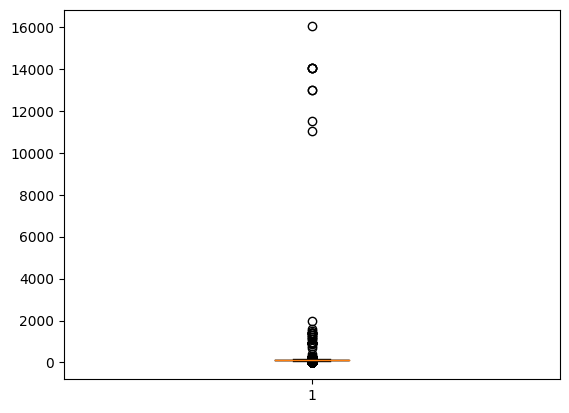

In [23]:
plt.boxplot(df.ap_hi);

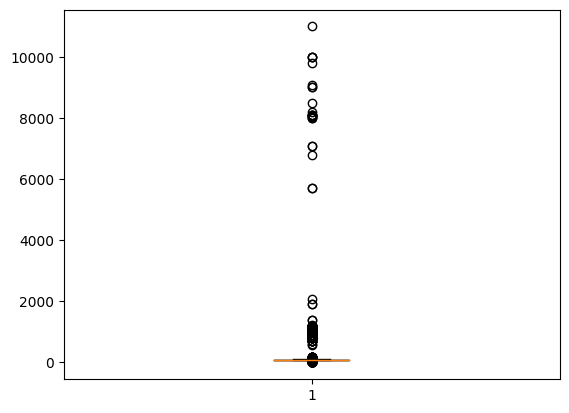

In [24]:
plt.boxplot(df.ap_lo);

In [25]:
df[df.ap_lo > 180].sort_values(by="ap_lo")["ap_lo"]

id
54282      182
70400      190
91264      190
91933      585
99006      602
         ...  
62058     9800
3352     10000
34098    10000
97907    10000
61901    11000
Name: ap_lo, Length: 956, dtype: int64

In [26]:
df[df.ap_hi >220].sort_values(by="ap_hi")["ap_hi"].head(11)

id
63928    230
96686    240
79903    240
61041    240
99019    240
46495    240
42394    240
37198    240
57646    309
58349    401
13616    701
Name: ap_hi, dtype: int64

In [27]:
df[df.ap_hi >20].sort_values(by="ap_hi")["ap_hi"]

id
75399       24
19634       60
55291       70
58065       70
19520       70
         ...  
36339    14020
67502    14020
66998    14020
36414    14020
58374    16020
Name: ap_hi, Length: 69813, dtype: int64

**Systolic blood pressure less than 25 mmHg is not possible in a viable medical condition. If these values are in your data, they are most likely caused by a measurement or input error.**

In [28]:
df=df[ (df.ap_lo <=190)  & (df.ap_hi > 25)& (df.ap_hi <= 240) ]
data=data[ (data.ap_lo <=190)  & (data.ap_hi > 25)& (data.ap_hi <= 240) ]

In [29]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,Men,168,62.0,110,80,normal,normal,No,Doesn't Drink,Active,No Disease
1,20228,Women,156,85.0,140,90,well above normal,normal,No,Doesn't Drink,Active,Has Disease
2,18857,Women,165,64.0,130,70,well above normal,normal,No,Doesn't Drink,Inactive,Has Disease
3,17623,Men,169,82.0,150,100,normal,normal,No,Doesn't Drink,Active,Has Disease
4,17474,Women,156,56.0,100,60,normal,normal,No,Doesn't Drink,Inactive,No Disease
...,...,...,...,...,...,...,...,...,...,...,...,...
99993,19240,Men,168,76.0,120,80,normal,normal,Yes,Doesn't Drink,Active,No Disease
99995,22601,Women,158,126.0,140,90,above normal,above normal,No,Doesn't Drink,Active,Has Disease
99996,19066,Men,183,105.0,180,90,well above normal,normal,No,Drink,Inactive,Has Disease


In [30]:
df.shape

(68822, 12)

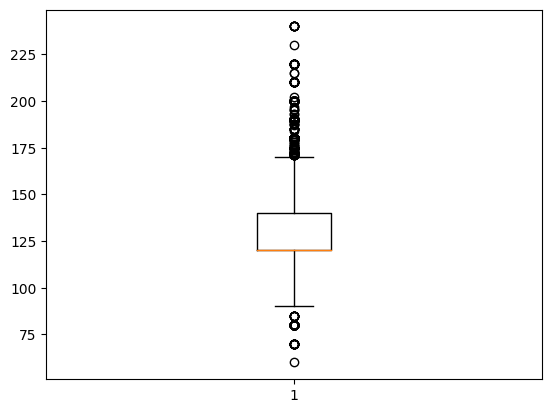

In [31]:
plt.boxplot(df.ap_hi);

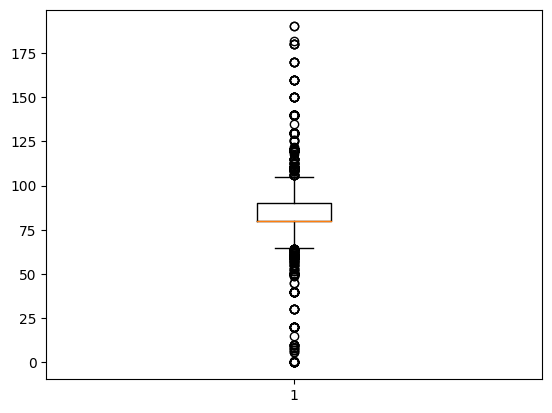

In [32]:
plt.boxplot(df.ap_lo);

Values at which the diastolic blood pressure reading (ap_lo) is less than 20 mmHg indicate very rare and very serious medical conditions. These conditions may be related to severe, potentially life-threatening hypotension. Here are some possible reasons:

**1. Shock**
Shock is a medical emergency that occurs when the body does not get enough blood, resulting in a very low blood pressure. There are several types of trauma:
Cardiogenic shock: caused by a weak heart and its inability to pump blood adequately.
Hemorrhagic shock: resulting from the loss of a large amount of blood (as a result of internal or external bleeding).
Septic shock: It occurs due to a severe infection that leads to a breakdown of the circulatory system.
Anaphylactic shock: a severe allergic reaction that leads to a sharp drop in blood pressure.

**2. Acute heart failure**
In cases of severe heart failure, the heart may not be able to pump blood effectively, causing diastolic blood pressure to drop to dangerous levels, such as less than 20.

**3. Severe internal bleeding or significant blood loss**
Loss of a large amount of blood due to severe internal or external bleeding (such as large wounds or intestinal bleeding) can lead to a significant drop in blood pressure. 

**4. Severe dehydration or low blood volume (hypovolemia)**
Hypovolemia may occur due to severe dehydration or loss of body fluids (as a result of vomiting or persistent diarrhea), resulting in a severe drop in blood pressure.


**5. Septicemia or general intoxication (Severe Sepsis)**
In cases of sepsis or septicemia, acute inflammation caused by infection may cause blood vessels to dilate excessively, reducing blood pressure to dangerous levels.


**6. Neurogenic Shock**
Nervous shock occurs when the nervous system loses its ability to control blood pressure due to a spinal cord or brain injury, resulting in excessive vasodilation and very low blood pressure.

## Maximum possible values of diastolic blood pressure in rare cases:

**1-Hypertensive Crisis**
In cases of heart attack or heart attack, diastolic blood pressure may reach very high values, exceeding 120-130 mmHg.
The crisis is a sharp rise in blood pressure that occurs when values exceed 120 mmHg, and these conditions are considered serious and require immediate medical attention.

**2-Cushing's Syndrome**
It causes an increase in the hormone cortisol, leading to a chronic rise in blood pressure. In this case, diastolic blood pressure can rise to 130-140 mmHg or more.

**3-Adrenal tumors (Pheochromocytoma)**
This rare condition, caused by an adrenal tumor, may lead to diastolic blood pressure rising to values of up to 150 mmHg or higher during severe episodes of increased secretion of the hormones adrenaline and noradrenaline.

**4-Acute kidney disease**
Kidney diseases such as kidney inflammation or severe renal insufficiency can lead to severe hypertension, including high diastolic blood pressure to values up to 130-150 mmHg.

**5- Narrowing of the arteries (Atherosclerosis)**
The accumulation of plaque in the arteries may lead to a chronic rise in blood pressure, increasing diastolic blood pressure to 140-160 mmHg in severe cases.

**6- Congestive Heart Failure**
In some cases of heart failure, diastolic blood pressure may rise to dangerous levels of up to 130-150 mmHg.

**Extreme medical conditions:
In rare and very serious medical cases, diastolic blood pressure values may reach 190 mmHg or higher, but this is very rare and indicates a very serious medical emergency that requires urgent medical attention**g:

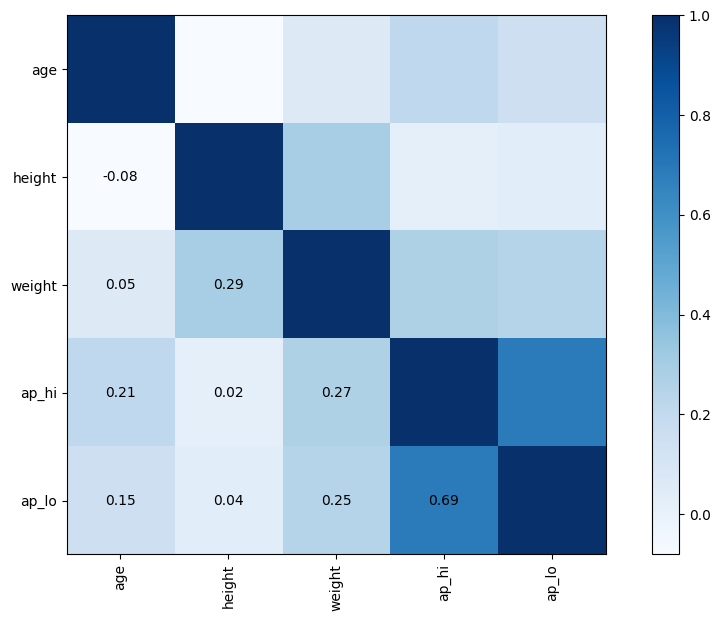

In [33]:
corr = df.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(12, 7))
plt.imshow(corr, cmap='Blues')
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)

for i in range(len(corr)):
    for j in range(len(corr)):
        if not mask[i, j]:
            plt.text(j, i, f"{corr.iloc[i, j]:.2f}", ha='center', va='center', color='black')

plt.show()


Text(0, 0.5, 'Diastolic Blood Pressure (ap_lo)')

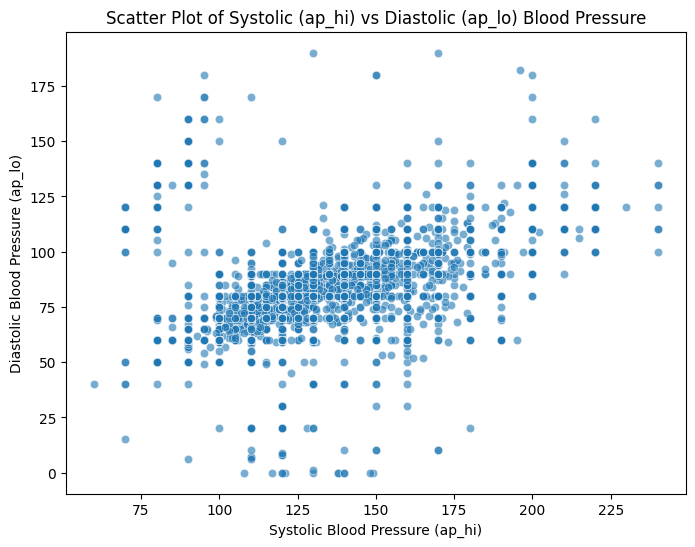

In [34]:
plt.figure(figsize=(8,6)) 
sns.scatterplot(x="ap_hi", y="ap_lo", data=df,  alpha=0.6)

plt.title("Scatter Plot of Systolic (ap_hi) vs Diastolic (ap_lo) Blood Pressure")
plt.xlabel("Systolic Blood Pressure (ap_hi)")
plt.ylabel("Diastolic Blood Pressure (ap_lo)")

In [35]:
correlation = df[['ap_hi', 'ap_lo']].corr().iloc[0, 1]
print(f"The correlation coefficient between ap_hi and ap_lo is: {correlation:.2f}")

The correlation coefficient between ap_hi and ap_lo is: 0.69


In [36]:
def categorize_blood_pressure(ap_hi, ap_lo):
    if ap_hi < 120 and ap_lo < 80:
        return 'Normal'
    elif 120 <= ap_hi < 140 or 80 <= ap_lo < 90:
        return 'Prehypertension'
    elif 140 <= ap_hi < 160 or 90 <= ap_lo < 100:
        return 'Hypertension Stage 1'
    elif 160 <= ap_hi or ap_lo >= 100:
        return 'Hypertension Stage 2'
    elif ap_hi >= 180 or ap_lo >= 120:
        return 'Hypertensive Crisis'
        
df['blood_pressure_category'] = df.apply(lambda row: categorize_blood_pressure(row['ap_hi'], row['ap_lo']), axis=1)
df[['ap_hi', 'ap_lo', 'blood_pressure_category']].head(10)

,ap_hi,ap_lo,blood_pressure_category
id,,,
0,110,80,Prehypertension
1,140,90,Hypertension Stage 1
2,130,70,Prehypertension
3,150,100,Hypertension Stage 1
4,100,60,Normal
8,120,80,Prehypertension
9,130,80,Prehypertension
12,130,90,Prehypertension
13,110,70,Normal


In [37]:
df['age_years'] = (df['age'] / 365).round().astype(int)

In [38]:
df['age_years']

id
0        50
1        55
2        52
3        48
4        48
         ..
99993    53
99995    62
99996    52
99998    61
99999    56
Name: age_years, Length: 68822, dtype: int64

In [39]:
df['age_years'].describe()

count    68822.000000
mean        53.325884
std          6.767891
min         30.000000
25%         48.000000
50%         54.000000
75%         58.000000
max         65.000000
Name: age_years, dtype: float64

<Axes: >

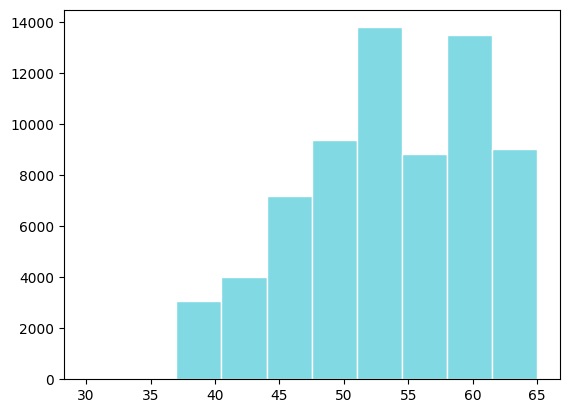

In [40]:
df['age_years'].hist(edgecolor="white",grid=False, color="#81DAE3")

In [41]:
df[df['age_years'] == df['age_years'].max()]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,blood_pressure_category,age_years
id,,,,,,,,,,,,,,
95,23589,Women,155,57.0,120,80,normal,normal,No,Doesn't Drink,Active,Has Disease,Prehypertension,65
422,23613,Men,181,99.0,130,90,normal,normal,No,Doesn't Drink,Active,Has Disease,Prehypertension,65
563,23661,Men,160,78.0,140,90,normal,normal,No,Doesn't Drink,Active,No Disease,Hypertension Stage 1,65
797,23578,Women,157,69.0,110,90,normal,above normal,No,Doesn't Drink,Active,No Disease,Hypertension Stage 1,65
921,23653,Women,154,79.0,130,80,normal,normal,No,Doesn't Drink,Active,No Disease,Prehypertension,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98749,23677,Women,169,70.0,120,80,well above normal,well above normal,No,Doesn't Drink,Active,Has Disease,Prehypertension,65
98888,23546,Women,170,90.0,120,80,normal,normal,No,Doesn't Drink,Active,No Disease,Prehypertension,65
99066,23578,Women,168,64.0,120,80,normal,normal,No,Doesn't Drink,Inactive,Has Disease,Prehypertension,65


In [42]:
df[df['age_years'] ==df['age_years'].min()]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,blood_pressure_category,age_years
id,,,,,,,,,,,,,,
8850,10878,Women,175,59.0,120,80,normal,normal,No,Doesn't Drink,Active,No Disease,Prehypertension,30
31922,10798,Men,175,92.0,100,60,normal,normal,No,Doesn't Drink,Active,No Disease,Normal,30
43842,10859,Women,159,59.0,120,80,normal,normal,No,Doesn't Drink,Active,No Disease,Prehypertension,30
79749,10964,Women,160,59.0,110,70,normal,normal,No,Doesn't Drink,Active,No Disease,Normal,30


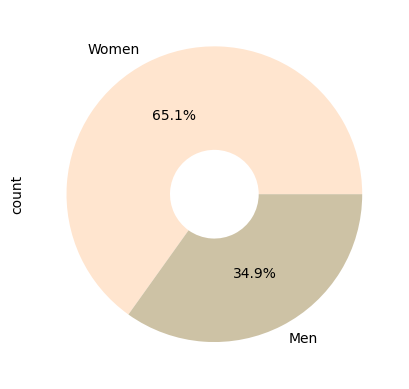

In [43]:
df.gender.value_counts().plot(kind ="pie" , autopct='%1.1f%%', colors=["#FFE5CF" , "#CDC2A5"], explode=(0,0), wedgeprops=dict(width=0.7));

Text(0, 0.5, 'Count')

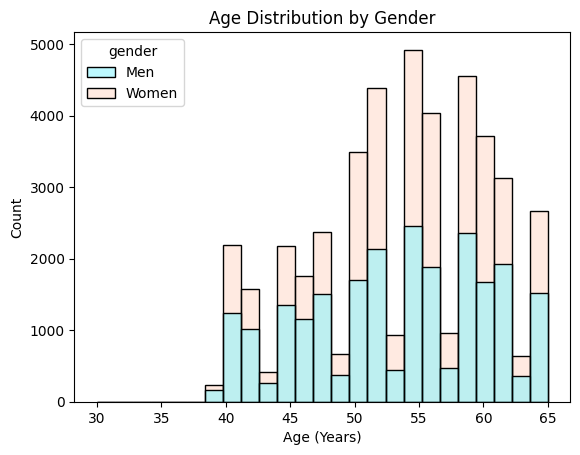

In [44]:
sns.histplot(data=df, x='age_years', hue='gender', kde=False, bins=25, palette=["#7CF5FF" ,"#FFD7C4"])

plt.title('Age Distribution by Gender')
plt.xlabel('Age (Years)')
plt.ylabel('Count')

## BMI = mass (kg) \ (height)^2 (m)

In [45]:
df['Bmi'] = round( df['weight'] / ((df['height'] / 100) ** 2) , 2)

In [46]:
df.Bmi

id
0        21.97
1        34.93
2        23.51
3        28.71
4        23.01
         ...  
99993    26.93
99995    50.47
99996    31.35
99998    27.10
99999    24.91
Name: Bmi, Length: 68822, dtype: float64

In [47]:
df.Bmi.describe()

count    68822.000000
mean        27.524003
std          6.066779
min          3.470000
25%         23.880000
50%         26.350000
75%         30.120000
max        298.670000
Name: Bmi, dtype: float64

In [48]:
df[['Bmi', 'weight', 'height']].corr()

,Bmi,weight,height
Bmi,1.000000,0.761806,-0.289969
weight,0.761806,1.000000,0.291552
height,-0.289969,0.291552,1.000000


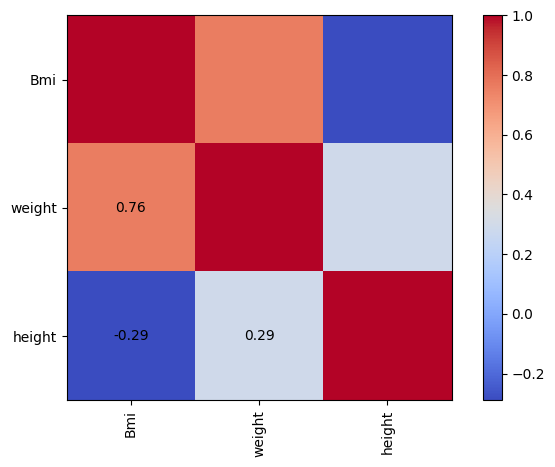

In [49]:
#sns.heatmap(df[['Bmi', 'weight', 'height']].corr() , annot=True, fmt=".1f")
corr = df[['Bmi', 'weight', 'height']].corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(8, 5))
plt.imshow(corr, cmap='coolwarm')
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)

for i in range(len(corr)):
    for j in range(len(corr)):
        if not mask[i, j]:
            plt.text(j, i, f"{corr.iloc[i, j]:.2f}", ha='center', va='center', color='black')

plt.show()


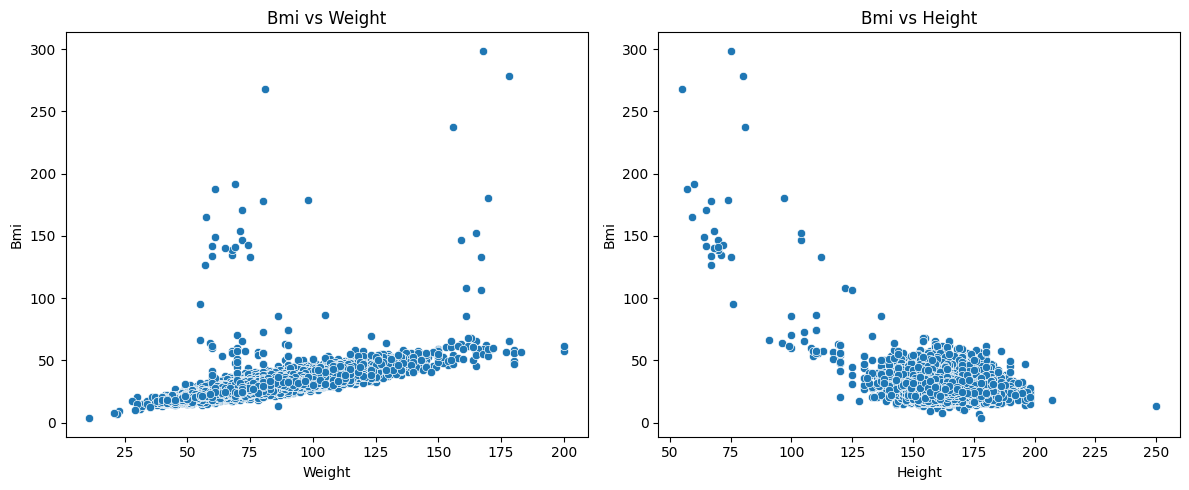

In [50]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x='weight', y='Bmi', data=df)
plt.title('Bmi vs Weight')
plt.xlabel('Weight')
plt.ylabel('Bmi')
plt.subplot(1, 2, 2)
sns.scatterplot(x='height', y='Bmi', data=df)
plt.title('Bmi vs Height')
plt.xlabel('Height')
plt.ylabel('Bmi')


plt.tight_layout()
plt.show()

In [51]:
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Wightloss'
    elif 18.5 <= bmi < 25:
        return 'Normal'
    elif 25 <= bmi < 30:
        return 'Overwight'
    elif 30 <= bmi < 35:
        return 'Obesity class 1'
    elif 35<= bmi < 40:
        return 'Obesity class 2'
    else: 
        return 'Extreme Obesity'

df['BMI_category'] = df['Bmi'].apply(categorize_bmi)


In [52]:
df['BMI_category']

id
0                 Normal
1        Obesity class 1
2                 Normal
3              Overwight
4                 Normal
              ...       
99993          Overwight
99995    Extreme Obesity
99996    Obesity class 1
99998          Overwight
99999             Normal
Name: BMI_category, Length: 68822, dtype: object

In [53]:
df['BMI_category'].unique()

array(['Normal', 'Obesity class 1', 'Overwight', 'Obesity class 2',
       'Wightloss', 'Extreme Obesity'], dtype=object)

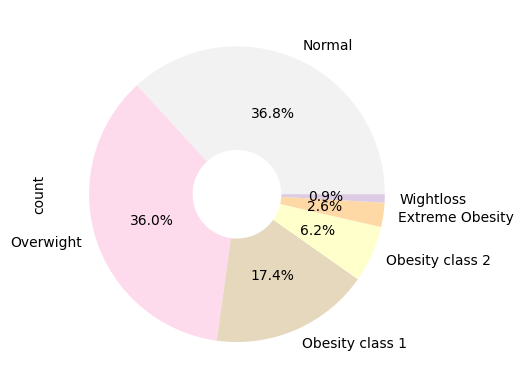

In [54]:
colors = plt.get_cmap('Pastel1_r').colors
df.BMI_category.value_counts().plot(kind ="pie" , autopct='%1.1f%%', colors=colors, explode=(0,0,0,0,0,0), wedgeprops=dict(width=0.7));


In [55]:
df_grouped = df.groupby("blood_pressure_category")["BMI_category"].value_counts()
df_grouped

blood_pressure_category  BMI_category   
Hypertension Stage 1     Overwight           4676
                         Obesity class 1     3103
                         Normal              3007
                         Obesity class 2     1222
                         Extreme Obesity      556
                         Wightloss             54
Hypertension Stage 2     Overwight            861
                         Obesity class 1      715
                         Normal               468
                         Obesity class 2      370
                         Extreme Obesity      211
                         Wightloss              7
Normal                   Normal              4751
                         Overwight           3096
                         Obesity class 1     1102
                         Obesity class 2      276
                         Wightloss            255
                         Extreme Obesity       89
Prehypertension          Normal             17117
         

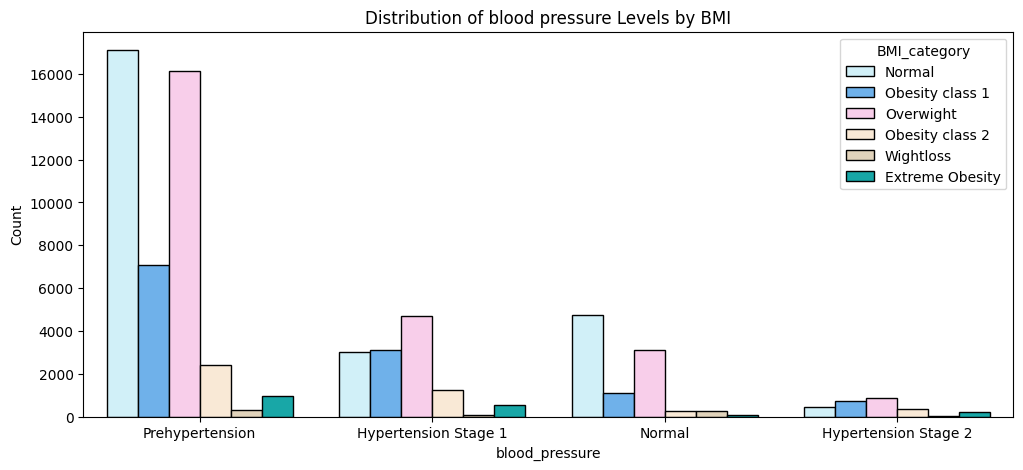

In [56]:
plt.figure(figsize=(12,5))  
sns.countplot(x="blood_pressure_category", hue="BMI_category", data=df, palette=["#CAF4FF", "#5AB2FF","#FFC7ED" ,"#FFE9D0" ,"#E7D4B5","c"] , edgecolor="black"
)

plt.title("Distribution of blood pressure Levels by BMI")
plt.xlabel("blood_pressure")
plt.ylabel("Count")


plt.show()

In [57]:
df.cholesterol.value_counts()

cholesterol
 normal              51614
above normal          9317
well above normal     7891
Name: count, dtype: int64

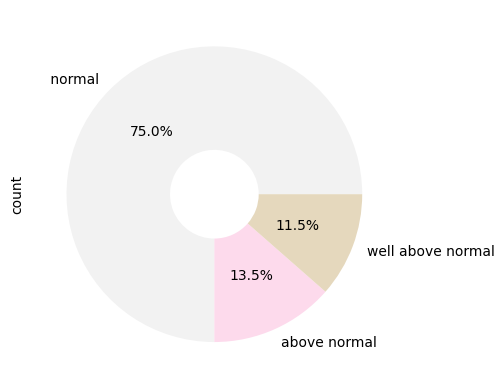

In [58]:
colors = plt.get_cmap('Pastel1_r').colors
df.cholesterol.value_counts().plot(kind ="pie" , autopct='%1.1f%%', colors=colors, explode=(0,0,0), wedgeprops=dict(width=0.7));

Data indicating cholesterol values is as follows:

**1: Normal:** means that the level of cholesterol in the blood is within normal and healthy limits.

**2: Above normal:** means that the cholesterol level is higher than normal, which is a sign of a possible problem with blood lipid levels, which may need medical attention or intervention (such as changing diet or using medications).

**3: Well above normal:** means that the cholesterol level is significantly higher than normal limits. This level may pose a higher health risk for cardiovascular disease and usually requires serious and prompt medical intervention such as medications or major lifestyle changes.

In [59]:
df_grouped = df.groupby("cholesterol")["BMI_category"].value_counts()
df_grouped

cholesterol        BMI_category   
 normal            Normal             20872
                   Overwight          18634
                   Obesity class 1     7921
                   Obesity class 2     2581
                   Extreme Obesity     1077
                   Wightloss            529
above normal       Overwight           3451
                   Normal              2580
                   Obesity class 1     2078
                   Obesity class 2      794
                   Extreme Obesity      340
                   Wightloss             74
well above normal  Overwight           2689
                   Obesity class 1     1993
                   Normal              1891
                   Obesity class 2      882
                   Extreme Obesity      402
                   Wightloss             34
Name: count, dtype: int64

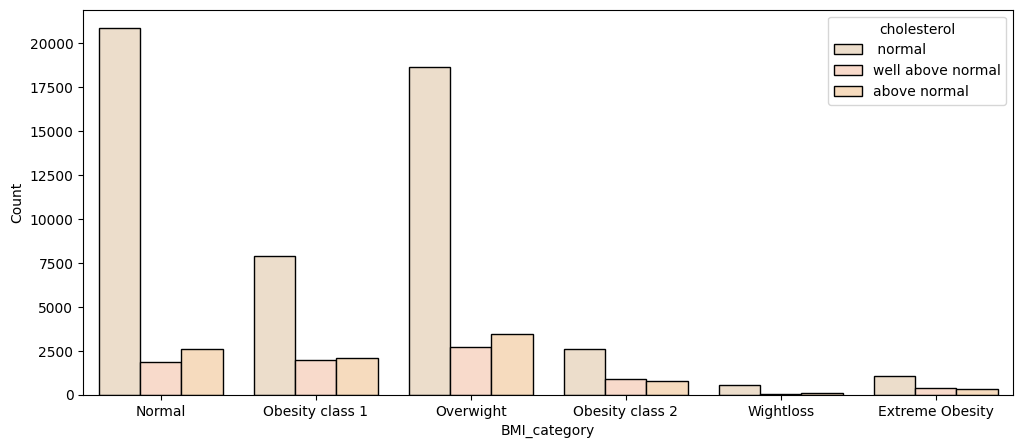

In [60]:
plt.figure(figsize=(12,5))  
sns.countplot(x="BMI_category", hue="cholesterol", data=df, palette=["#F1DEC6" , "#FFD7C4","#FFDBB5"],edgecolor="black"
)

plt.xlabel("BMI_category")
plt.ylabel("Count")


plt.show()

In [61]:
df_grouped = df.groupby("cholesterol")["BMI_category"].value_counts()
df_grouped

cholesterol        BMI_category   
 normal            Normal             20872
                   Overwight          18634
                   Obesity class 1     7921
                   Obesity class 2     2581
                   Extreme Obesity     1077
                   Wightloss            529
above normal       Overwight           3451
                   Normal              2580
                   Obesity class 1     2078
                   Obesity class 2      794
                   Extreme Obesity      340
                   Wightloss             74
well above normal  Overwight           2689
                   Obesity class 1     1993
                   Normal              1891
                   Obesity class 2      882
                   Extreme Obesity      402
                   Wightloss             34
Name: count, dtype: int64

In [62]:
df.gluc.value_counts()

gluc
normal               58510
well above normal     5236
above normal          5076
Name: count, dtype: int64

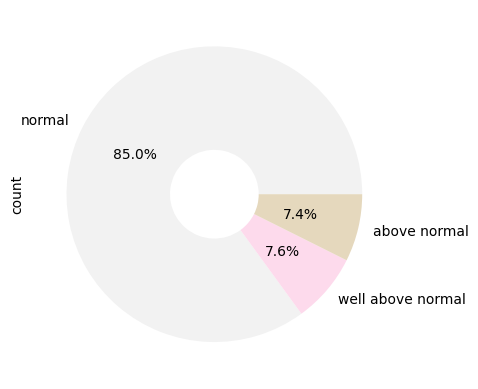

In [63]:
colors = plt.get_cmap('Pastel1_r').colors
df.gluc.value_counts().plot(kind ="pie" , autopct='%1.1f%%', colors=colors, explode=(0,0,0), wedgeprops=dict(width=0.7));


Values indicating glucose (gluc) in the blood are interpreted as follows:

**1: Normal:** means that the blood glucose level is within normal and healthy limits. This suggests that the body is able to regulate blood sugar levels well.

**2: Above normal:** means that the glucose level is higher than normal, which may be a sign of a problem with the body's ability to regulate blood sugar. This condition may be a sign of pre-diabetes.

**3: Well above normal:** means that the glucose level is significantly higher than normal limits. This level usually indicates hyperglycemia, a common symptom of diabetes. This can be dangerous if not treated and needs urgent medical care.

In [64]:
data[["gluc" , "cholesterol"]].corr(numeric_only=True)

,gluc,cholesterol
gluc,1.000000,0.451103
cholesterol,0.451103,1.000000


In [65]:
df.groupby("gluc")["cholesterol"].value_counts()

gluc               cholesterol      
above normal       above normal          2375
                    normal               2199
                   well above normal      502
normal              normal              47951
                   above normal          6571
                   well above normal     3988
well above normal  well above normal     3401
                    normal               1464
                   above normal           371
Name: count, dtype: int64

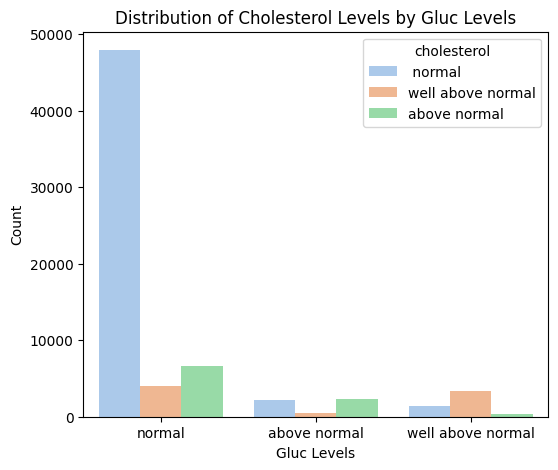

In [66]:
plt.figure(figsize=(6,5))  
sns.countplot(x="gluc", hue="cholesterol", data=df, palette="pastel")

plt.title("Distribution of Cholesterol Levels by Gluc Levels")
plt.xlabel("Gluc Levels")
plt.ylabel("Count")


plt.show()

In [67]:
df.groupby(["gender" , "gluc"])["cholesterol"].value_counts()

gender  gluc               cholesterol      
Men     above normal        normal                827
                           above normal           747
                           well above normal      150
        normal              normal              17150
                           above normal          2175
                           well above normal     1301
        well above normal  well above normal      991
                            normal                532
                           above normal           128
Women   above normal       above normal          1628
                            normal               1372
                           well above normal      352
        normal              normal              30801
                           above normal          4396
                           well above normal     2687
        well above normal  well above normal     2410
                            normal                932
                           above norm

In [68]:
df.smoke.value_counts()

smoke
No     62767
Yes     6055
Name: count, dtype: int64

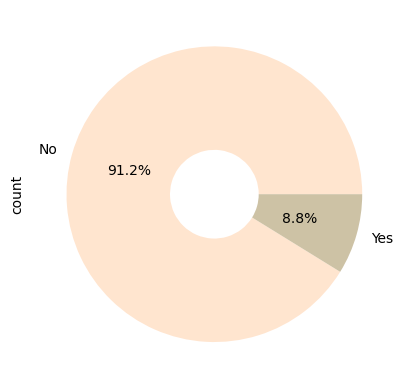

In [69]:
df.smoke.value_counts().plot(kind ="pie" , autopct='%1.1f%%', colors=["#FFE5CF" , "#CDC2A5"], explode=(0,0), wedgeprops=dict(width=0.7));

In [70]:
df.groupby("gender")["smoke"].value_counts()

gender  smoke
Men     No       18742
        Yes       5259
Women   No       44025
        Yes        796
Name: count, dtype: int64

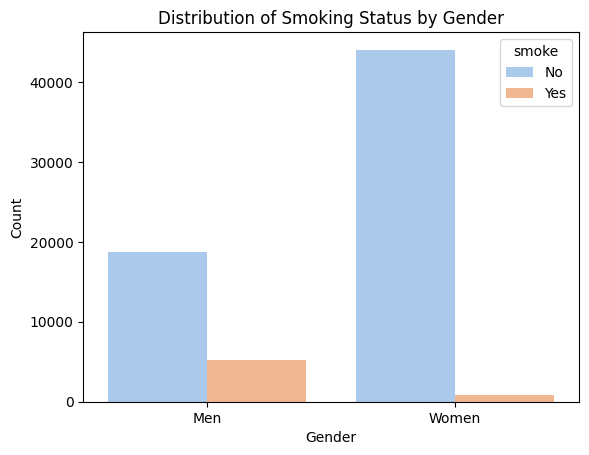

In [71]:
sns.countplot(x="gender", hue="smoke", data=df, palette="pastel")

plt.title("Distribution of Smoking Status by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")

plt.show()

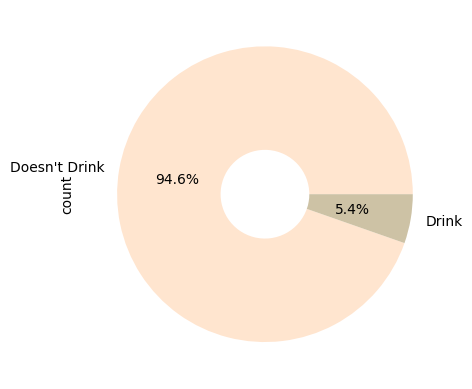

In [72]:
df.alco.value_counts().plot(kind ="pie" , autopct='%1.1f%%', colors=["#FFE5CF" , "#CDC2A5"], explode=(0,0), wedgeprops=dict(width=0.7));

In [73]:
data[["alco" , "smoke"]].corr()

,alco,smoke
alco,1.000000,0.339997
smoke,0.339997,1.000000


In [74]:
df.groupby("smoke")["alco"].value_counts()

smoke  alco         
No     Doesn't Drink    60894
       Drink             1873
Yes    Doesn't Drink     4237
       Drink             1818
Name: count, dtype: int64

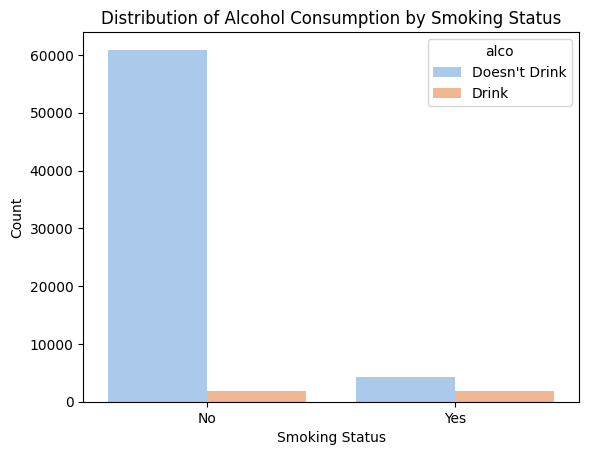

In [75]:
sns.barplot(x="smoke", y="count", hue="alco", data=df.groupby(["smoke", "alco"]).size().reset_index(name='count'), palette="pastel")

plt.title("Distribution of Alcohol Consumption by Smoking Status")
plt.xlabel("Smoking Status")
plt.ylabel("Count");


In [76]:
smoke_drink = df[ (df["smoke"]=="Yes") &  (df["alco"]=="Drink") ]
smoke_drink

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,blood_pressure_category,age_years,Bmi,BMI_category
id,,,,,,,,,,,,,,,,
23,14532,Men,181,95.0,130,90,normal,normal,Yes,Drink,Active,No Disease,Prehypertension,40,29.00,Overwight
142,14499,Men,164,48.0,110,70,normal,above normal,Yes,Drink,Active,Has Disease,Normal,40,17.85,Wightloss
180,21473,Men,174,90.0,140,80,normal,normal,Yes,Drink,Inactive,Has Disease,Prehypertension,59,29.73,Overwight
240,21848,Men,170,69.0,120,80,normal,normal,Yes,Drink,Active,No Disease,Prehypertension,60,23.88,Normal
318,23376,Men,175,75.0,180,100,well above normal,normal,Yes,Drink,Active,Has Disease,Hypertension Stage 2,64,24.49,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99779,17256,Men,173,70.0,130,80,normal,normal,Yes,Drink,Active,No Disease,Prehypertension,47,23.39,Normal
99858,19475,Men,171,65.0,120,80,normal,normal,Yes,Drink,Active,No Disease,Prehypertension,53,22.23,Normal
99933,19137,Men,167,74.0,130,80,normal,normal,Yes,Drink,Active,No Disease,Prehypertension,52,26.53,Overwight


In [77]:
df.active.value_counts()

active
Active      55292
Inactive    13530
Name: count, dtype: int64

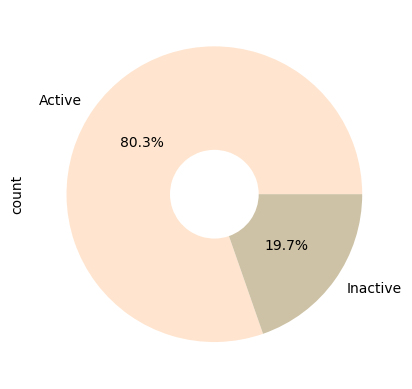

In [78]:
df.active.value_counts().plot(kind ="pie" , autopct='%1.1f%%', colors=["#FFE5CF" , "#CDC2A5"], explode=(0,0), wedgeprops=dict(width=0.7));

In [79]:
df.cardio.value_counts()

cardio
No Disease     34764
Has Disease    34058
Name: count, dtype: int64

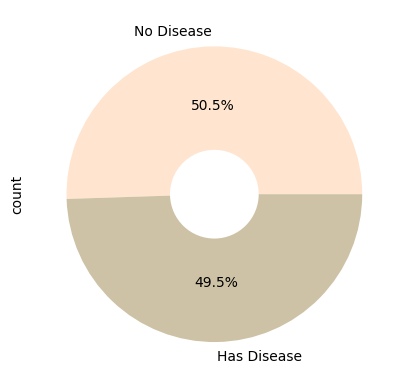

In [80]:
df.cardio.value_counts().plot(kind ="pie" , autopct='%1.1f%%', colors=["#FFE5CF" , "#CDC2A5"], explode=(0,0), wedgeprops=dict(width=0.7));

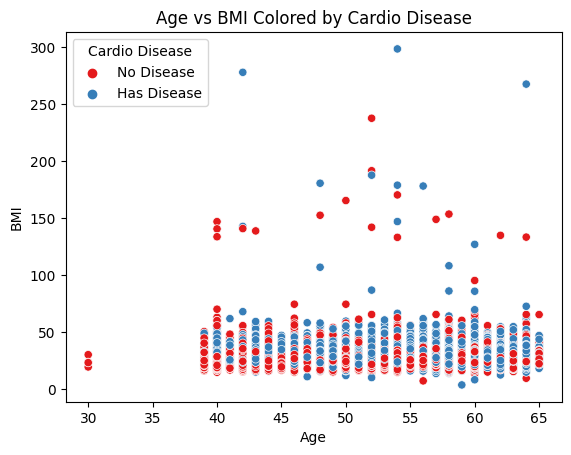

In [81]:
sns.scatterplot(y='Bmi', x='age_years', hue='cardio', data=df, palette='Set1')

plt.title('Age vs BMI Colored by Cardio Disease')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.legend(title='Cardio Disease')
plt.show()

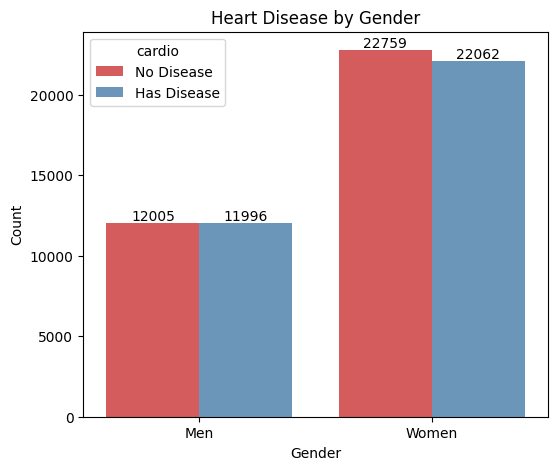

In [82]:
plt.figure(figsize=(6,5))
axis=sns.countplot(data=df, x='gender', hue='cardio', palette='Set1' , alpha=0.8)
axis.bar_label(axis.containers[0]);
axis.bar_label(axis.containers[1]);
plt.title('Heart Disease by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

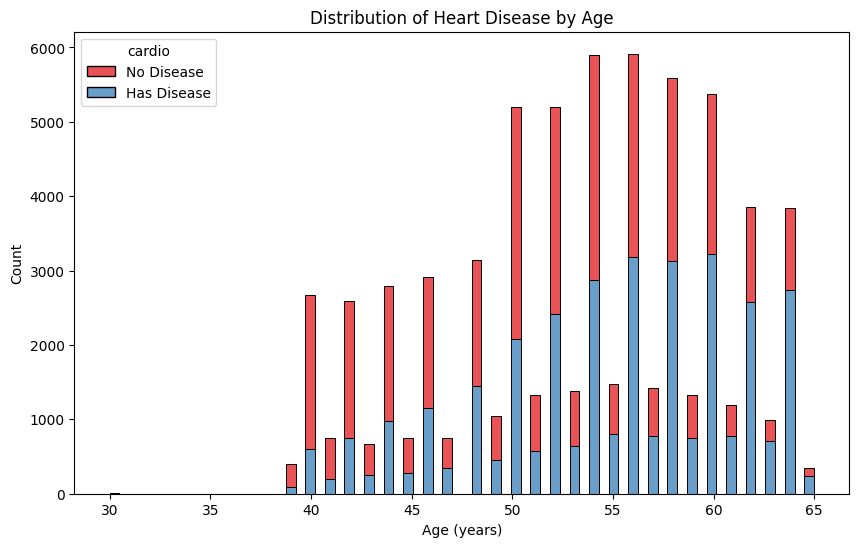

In [83]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='age_years', hue='cardio', multiple='stack', kde=False, palette='Set1')
plt.title('Distribution of Heart Disease by Age')
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.show()

In [84]:
round( pd.crosstab(df['BMI_category'], df['cardio'], normalize='index') * 100 , 2)

cardio,Has Disease,No Disease
BMI_category,,
Extreme Obesity,68.17,31.83
Normal,39.76,60.24
Obesity class 1,59.91,40.09
Obesity class 2,67.23,32.77
Overwight,50.53,49.47
Wightloss,27.79,72.21


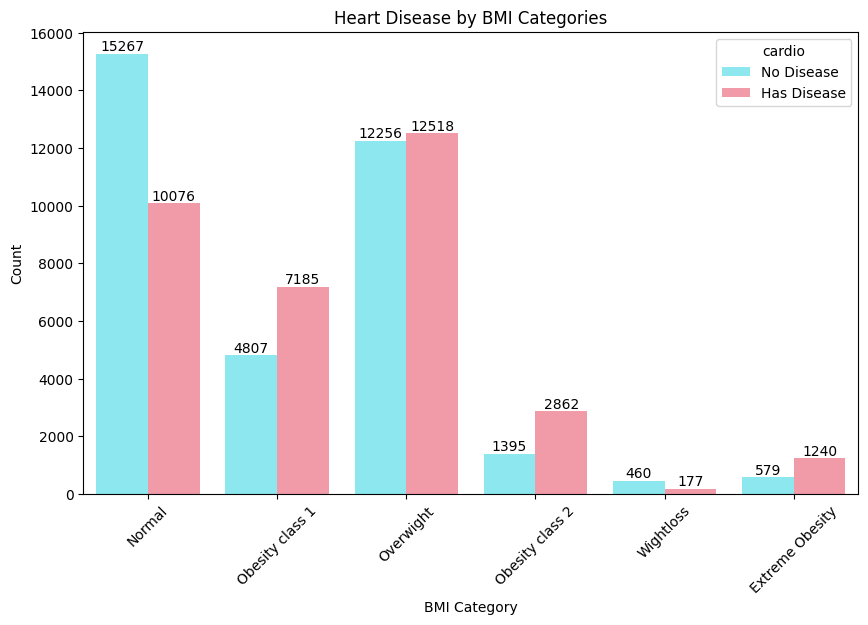

In [85]:
plt.figure(figsize=(10,6))
axis=sns.countplot(data=df, x='BMI_category', hue='cardio', palette=["#7CF5FF" ,"#FF8C9E"])
axis.bar_label(axis.containers[0])
axis.bar_label(axis.containers[1])
plt.title('Heart Disease by BMI Categories')
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [86]:
round( pd.crosstab(df['blood_pressure_category'], df['cardio'], normalize='index') * 100 , 2)

cardio,Has Disease,No Disease
blood_pressure_category,,
Hypertension Stage 1,82.43,17.57
Hypertension Stage 2,84.73,15.27
Normal,22.14,77.86
Prehypertension,43.88,56.12


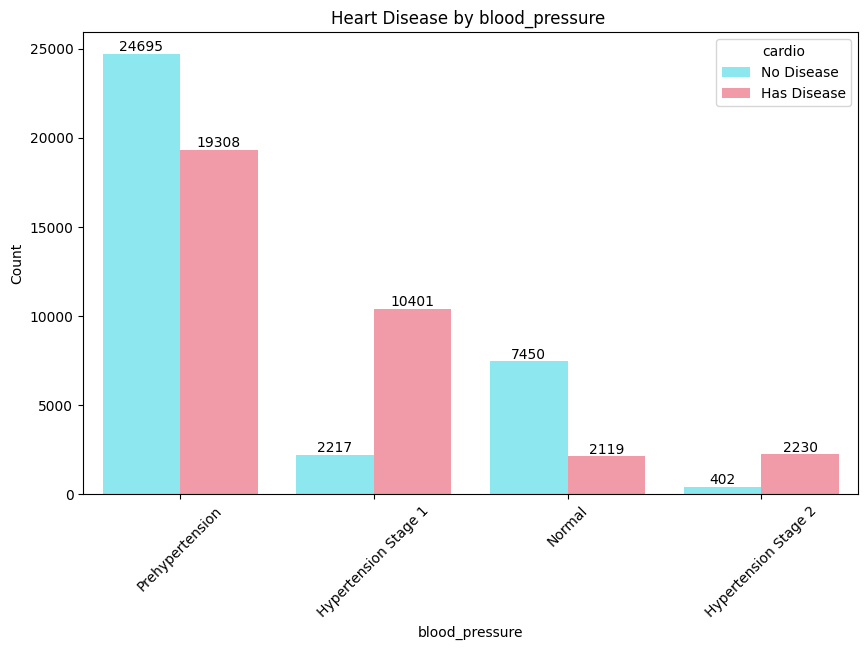

In [87]:

plt.figure(figsize=(10,6))
axis=sns.countplot(data=df, x='blood_pressure_category', hue='cardio', palette=["#7CF5FF" ,"#FF8C9E"])
axis.bar_label(axis.containers[0])
axis.bar_label(axis.containers[1])
plt.title('Heart Disease by blood_pressure ')
plt.xlabel('blood_pressure')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [88]:
round( pd.crosstab(df['cholesterol'], df['cardio'], normalize='index') * 100 , 2)

cardio,Has Disease,No Disease
cholesterol,,
normal,43.56,56.44
above normal,59.63,40.37
well above normal,76.29,23.71


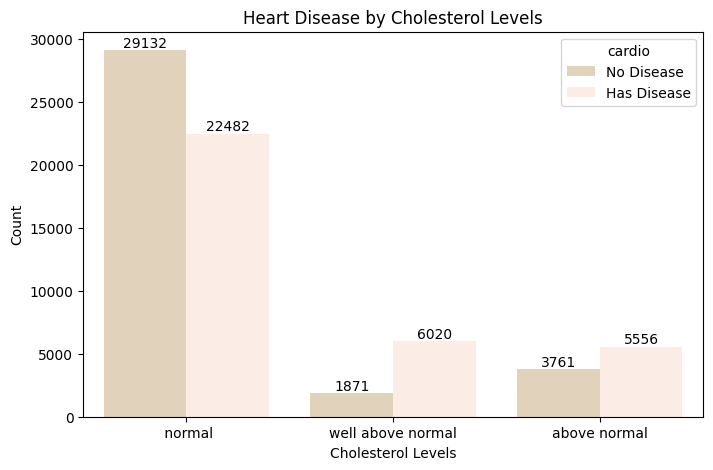

In [89]:
plt.figure(figsize=(8,5))
axis= sns.countplot(data=df, x='cholesterol', hue='cardio', palette=["#E7D4B5" ,"#FEECE2"])
axis.bar_label(axis.containers[0])
axis.bar_label(axis.containers[1])

plt.title('Heart Disease by Cholesterol Levels')
plt.xlabel('Cholesterol Levels')
plt.ylabel('Count')
plt.show()

In [90]:
round( pd.crosstab(df['gluc'], df['cardio'], normalize='index') * 100 , 2)

cardio,Has Disease,No Disease
gluc,,
above normal,58.87,41.13
normal,47.56,52.44
well above normal,61.88,38.12


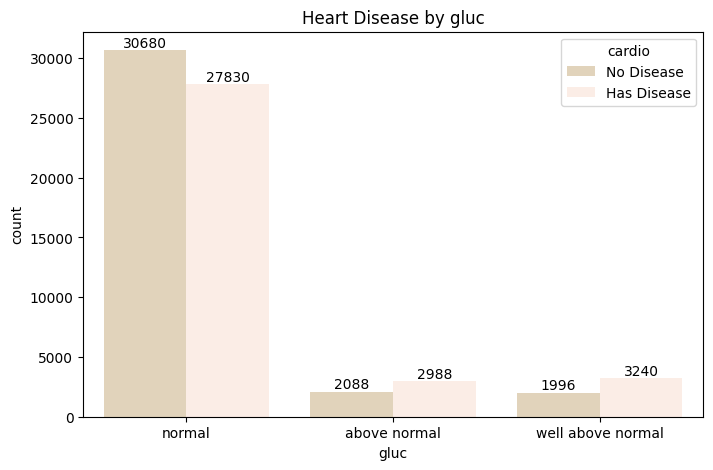

In [91]:
plt.figure(figsize=(8,5))
axis= sns.countplot(data=df, x='gluc', hue='cardio', palette=["#E7D4B5" ,"#FEECE2"])
axis.bar_label(axis.containers[0])
axis.bar_label(axis.containers[1])
plt.title('Heart Disease by gluc');


In [92]:
df_grouped = df.groupby(["cardio", "cholesterol"])["gluc"].value_counts().reset_index(name='count')
df_grouped.set_index(['cardio' , "cholesterol","gluc"], inplace=True)

df_grouped

count
cardio      cholesterol       gluc                    
Has Disease  normal           normal             20632
                              above normal        1176
                              well above normal    674
            above normal      normal              3930
                              above normal        1404
                              well above normal    222
            well above normal normal              3268
                              well above normal   2344
                              above normal         408
No Disease   normal           normal             27319
                              above normal        1023
                              well above normal    790
            above normal      normal              2641
                              above normal         971
                              well above normal    149
            well above normal well above normal   1057
                              normal               720
                              above normal          94

In [93]:
round( pd.crosstab(df['smoke'], df['cardio'], normalize='index') * 100 , 2)

cardio,Has Disease,No Disease
smoke,,
No,49.74,50.26
Yes,46.87,53.13


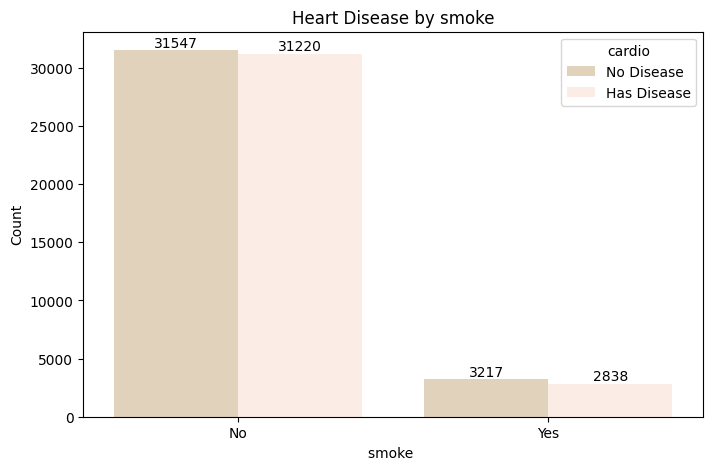

In [94]:
plt.figure(figsize=(8,5))
axis= sns.countplot(data=df, x='smoke', hue='cardio', palette=["#E7D4B5" ,"#FEECE2"])
axis.bar_label(axis.containers[0]);
axis.bar_label(axis.containers[1]);

plt.title('Heart Disease by smoke')
plt.xlabel('smoke ')
plt.ylabel('Count')
plt.show()

In [95]:
df_grouped = df.groupby(["cardio", "smoke"])["alco"].value_counts().reset_index(name='count')
df_grouped.set_index(['cardio', 'smoke',"alco"], inplace=True)

df_grouped

count
cardio      smoke alco                
Has Disease No    Doesn't Drink  30255
                  Drink            965
            Yes   Doesn't Drink   2039
                  Drink            799
No Disease  No    Doesn't Drink  30639
                  Drink            908
            Yes   Doesn't Drink   2198
                  Drink           1019

In [96]:
round( pd.crosstab(df['active'], df['cardio'], normalize='index') * 100 , 2)

cardio,Has Disease,No Disease
active,,
Active,48.57,51.43
Inactive,53.24,46.76


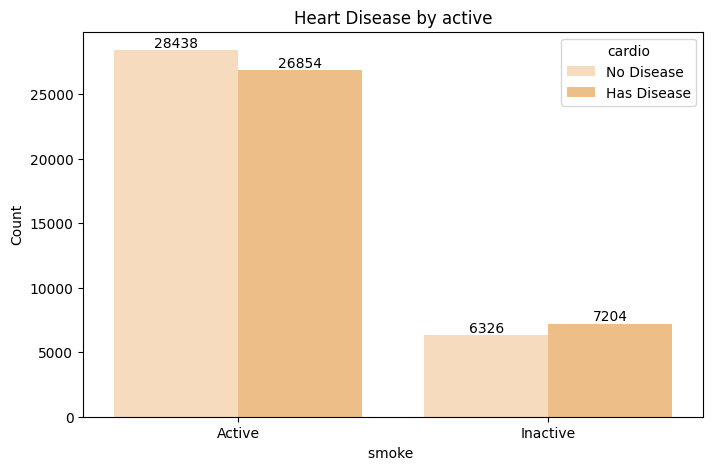

In [97]:
plt.figure(figsize=(8,5))
axis= sns.countplot(data=df, x='active', hue='cardio', palette=["#FFDBB5", "#FFBF78"])
axis.bar_label(axis.containers[0]);
axis.bar_label(axis.containers[1]);

plt.title('Heart Disease by active')
plt.xlabel('smoke ')
plt.ylabel('Count')
plt.show()

In [ ]:

# Confusion Matrix for Model Evaluation
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming y_test and y_pred are defined based on the model's test predictions
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="Blues")


In [ ]:

# PCA for Dimensionality Reduction
from sklearn.decomposition import PCA

# Performing PCA
pca = PCA(n_components=2)  # Adjust n_components as needed
X_pca = pca.fit_transform(X)  # Assuming X is the features dataset

# Visualize explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# Optional: Plotting PCA components
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("2D PCA of Dataset")
plt.colorbar()
plt.show()


In [ ]:

# Data Splitting
from sklearn.model_selection import train_test_split

# Assuming 'X' as features and 'y' as labels in the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model Training
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Generate Predictions
y_pred = model.predict(X_test)


In [ ]:

# Confusion Matrix for Model Evaluation
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="Blues")
